In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q2: KNN

/tmp/ipykernel_7594/2665714680.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bins, rotation=50)


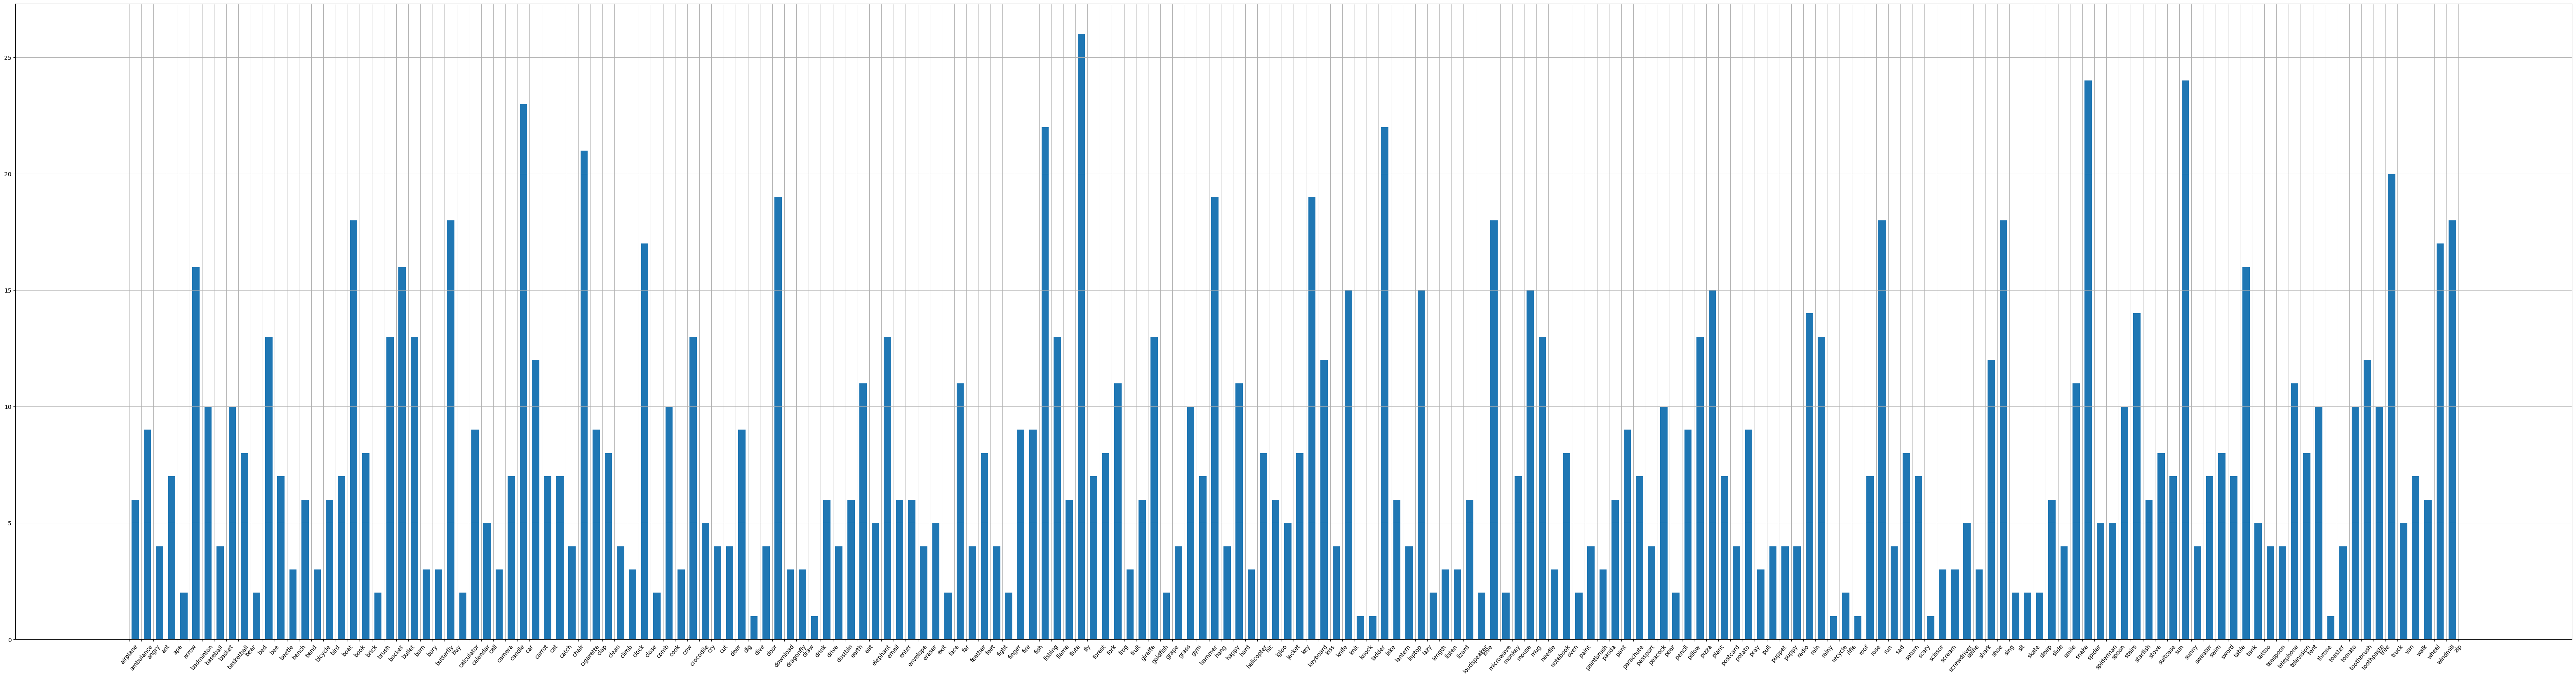

In [2]:
# Load data from the .npy file
loaded_data = np.load("./bin/data.npy",allow_pickle=True)

X = loaded_data[:,2]
for i in range(len(X)):
    X[i] = X[i].flatten()
y = loaded_data[:,3]

# Visualising the data:
bins, counts = np.unique(y,return_counts = True)
plt.figure(figsize=(80,20))
ax = plt.axes()
ax.set_xticklabels(bins, rotation=50)
plt.hist(bins,bins, weights=counts, rwidth=0.6)
plt.grid()
plt.show()


In [3]:
class kNN():
    def __init__ (self, k, distanceMeasure='euclidean'):
        self.k = k
        self.distanceMeasure = distanceMeasure
    def fitData(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def calcDist(self, p1, p2):
        if (self.distanceMeasure=='euclidean'):
            distSq = np.sum((p2-p1)**2)
            return np.sqrt(distSq)
        if (self.distanceMeasure=='cosine'):
            cosineDist = 1 - np.dot(p2,p1)/(np.sqrt(np.dot(p1,p1)) * np.sqrt(np.dot(p2,p2)))
            return cosineDist
        if (self.distanceMeasure=='manhattan'):
            manhattanDist = np.sum(np.abs(p2-p1))
            return manhattanDist
        
    def predict(self, X_test):
        # firstly we will find k nearest neighbours by calculating distance between current point and others
        y_preds = []
        for i in range (len(X_test)):
            distances = np.zeros(self.X_train.size)
            
            for j in range(0,len(distances)):
                distances[j] = self.calcDist(self.X_train[j],X_test[i])

            sortedIndices = np.argsort(distances)
            kNearestLabels = self.y_train[sortedIndices[0:self.k]]
            labels, counts = np.unique(kNearestLabels, return_counts = True)
            y_preds.append(labels[np.argsort(counts)[len(counts)-1]])
        return y_preds
        

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import time

splitIndex = 1300
X_train,y_train = (X[:splitIndex],y[:splitIndex])
X_test, y_test = (X[splitIndex:],y[splitIndex:])

kNN_classifierV1 = kNN(3,distanceMeasure="euclidean")
kNN_classifierV1.fitData(X_train=X_train,y_train=y_train)
startTime = time.time()
y_preds = kNN_classifierV1.predict(X_test=X_test)
initialTime = time.time()-startTime
print("DistaneMeasure = Euclidean, k = 3")
print(f"Accuracy = {accuracy_score(y_test,y_preds)}")
print(f"Precision = {precision_score(y_test,y_preds,average='micro')}")
print(f"F1 Score = {f1_score(y_test,y_preds,average='micro')}")
print(f"Recall = {recall_score(y_test,y_preds,average='micro')}")

DistaneMeasure = Euclidean, k = 3
Accuracy = 0.21
Precision = 0.21
F1 Score = 0.20999999999999996
Recall = 0.21


In [5]:
import time

kValues = np.arange(1,20,1)
distanceMeasures = ['euclidean','cosine','manhattan']
inputTypes = {'resnet':1,'VIT':2}

parameters = []
accuracyList = []
timeList = []

loaded_data = np.load("./bin/data.npy",allow_pickle=True)
for k in kValues:
    for distanceMeasure in distanceMeasures:
        for inputType in inputTypes:
            X = loaded_data[:,inputTypes[inputType]]
            for i in range(len(X)):
                X[i] = X[i].flatten()
            y = loaded_data[:,3]
            splitIndex = 1300
            X_train,y_train = (X[:splitIndex],y[:splitIndex])
            X_test, y_test = (X[splitIndex:],y[splitIndex:])

            kNN_classifierV2 = kNN(k=k,distanceMeasure=distanceMeasure)
            kNN_classifierV2.fitData(X_train=X_train,y_train=y_train)
            
            startTime = time.time()
            y_preds = kNN_classifierV2.predict(X_test=X_test)
            timeList.append(time.time()-startTime)

            acc = accuracy_score(y_test,y_preds)

            parameters.append((k,distanceMeasure,inputType))
            accuracyList.append(acc)

parameters = np.array(parameters)
accuracyList = np.array(accuracyList)
timeList = np.array(timeList)

In [6]:
topN = 20
bestParameters = parameters[np.argsort(accuracyList)][::-1][:topN]
correspondingAcc = np.sort(accuracyList)[::-1][:topN]
correspondingTime = timeList[np.argsort(accuracyList)]

print(f"Best triplet: k={bestParameters[0][0]}, {bestParameters[0][1]}, {bestParameters[0][2]}")
print("Ordered rank list:")
for i in range(len(bestParameters)):
    print(f"{bestParameters[i][0]} \t{bestParameters[i][1]}  \t{bestParameters[i][2]} \tAccuracy = {correspondingAcc[i]} \tTime = {correspondingTime[i]}")

Best triplet: k=1, euclidean, VIT
Ordered rank list:
1 	euclidean  	VIT 	Accuracy = 0.26 	Time = 1.2901206016540527
1 	manhattan  	VIT 	Accuracy = 0.26 	Time = 1.280681848526001
17 	manhattan  	VIT 	Accuracy = 0.255 	Time = 1.5473339557647705
18 	manhattan  	VIT 	Accuracy = 0.255 	Time = 1.3556923866271973
1 	cosine  	VIT 	Accuracy = 0.255 	Time = 1.2969534397125244
16 	manhattan  	VIT 	Accuracy = 0.245 	Time = 1.2724475860595703
8 	cosine  	VIT 	Accuracy = 0.245 	Time = 1.3769657611846924
8 	manhattan  	VIT 	Accuracy = 0.24 	Time = 1.4315547943115234
14 	manhattan  	VIT 	Accuracy = 0.24 	Time = 1.542428731918335
15 	manhattan  	VIT 	Accuracy = 0.24 	Time = 1.3855082988739014
13 	manhattan  	VIT 	Accuracy = 0.235 	Time = 1.5443291664123535
12 	manhattan  	VIT 	Accuracy = 0.235 	Time = 1.5632195472717285
8 	euclidean  	VIT 	Accuracy = 0.235 	Time = 1.494429588317871
9 	manhattan  	VIT 	Accuracy = 0.235 	Time = 1.675225019454956
9 	cosine  	VIT 	Accuracy = 0.235 	Time = 1.036638021469116

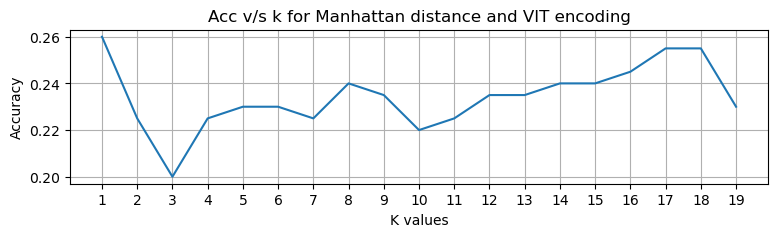

In [7]:
indices = np.where((parameters[:,1] == 'manhattan') & (parameters[:,2] == 'VIT'))
plt.figure(figsize=(9,2))
ax = plt.axes()
plt.plot(parameters[indices][:,0], accuracyList[indices])
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.title("Acc v/s k for Manhattan distance and VIT encoding")
plt.grid()
plt.show()

In [8]:
### sklearn KNN classifier
X_train2 = X_train.tolist()
y_train2 = y_train.tolist()
X_test2 = X_test.tolist()
from sklearn.neighbors import KNeighborsClassifier
SKmodelKNN = KNeighborsClassifier(n_neighbors=5)
SKmodelKNN.fit(np.array(X_train2),np.array(y_train2))
startTime = time.time()
y_preds = SKmodelKNN.predict(X_test2)
timeTaken = time.time() - startTime
accSK = accuracy_score(y_test,y_preds)
print(f"Accuracy of default SK learn Knn model = {accSK}")

Accuracy of default SK learn Knn model = 0.2


Initial model: 
['3', 'euclidean', 'resnet'] 	 Time = 1.3190951347351074

Best accuracy model: 
['1' 'euclidean' 'VIT'] 	 Time = 1.2897772789001465

Fastest model: 
['11' 'manhattan' 'VIT'] 	 Time = 0.9529211521148682

SKLearn model: 
SKLearn model 	 Time = 0.09713244438171387


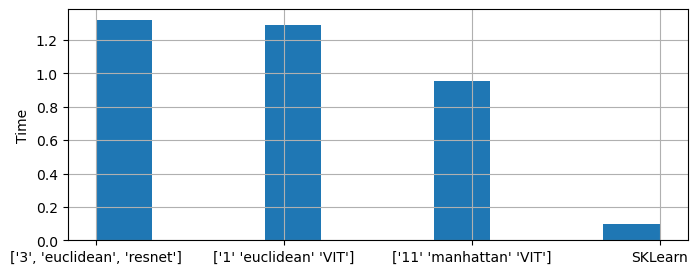

In [9]:
# inital KNN model time
triplet1,time1 = ['3','euclidean','resnet'], initialTime
print("Initial model: ")
print(f"{triplet1} \t Time = {time1}\n")

# best KNN model time
triplet2,time2 = parameters[accuracyList.argmax()], timeList[accuracyList.argmax()]
print("Best accuracy model: ")
print(f"{triplet2} \t Time = {time2}\n")

# fastest KNN model time
triplet3,time3 = parameters[timeList.argmin()], timeList.min()
print("Fastest model: ")
print(f"{triplet3} \t Time = {time3}")

print("\nSKLearn model: ")
print(f"SKLearn model \t Time = {timeTaken}")

plt.figure(figsize=(8,3))
ax = plt.axes()
plt.hist([str(triplet1),str(triplet2),str(triplet3),"SKLearn"], weights = [time1,time2,time3,timeTaken])
plt.ylabel("Time")
plt.grid()
plt.show()


### Q3: Decision tree

In [10]:
def labelEncode(column):
    temp = np.unique(column)
    out = []
    Dict = {}
    for i in range(len(temp)):
        Dict[temp[i]] = i 
    for i in column:
        out.append(Dict[i])
    return np.array(out)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("./bin/advertisement.csv")
data2 = df.to_numpy()
### Data Pre Processing
data2[:,1] = labelEncode(data2[:,1]) # gender
data2[:,3] = labelEncode(data2[:,3]) # education 
data2[:,4] = labelEncode(data2[:,4]) # married
data2[:,6] = labelEncode(data2[:,6]) # city
data2[:,7] = labelEncode(data2[:,7]) # occupation
data2[:,9] = labelEncode(data2[:,9]) # most bought item

X = data2[:,:10]
y = data2[:,10]

/tmp/ipykernel_7594/3216268109.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(bins, rotation=90)


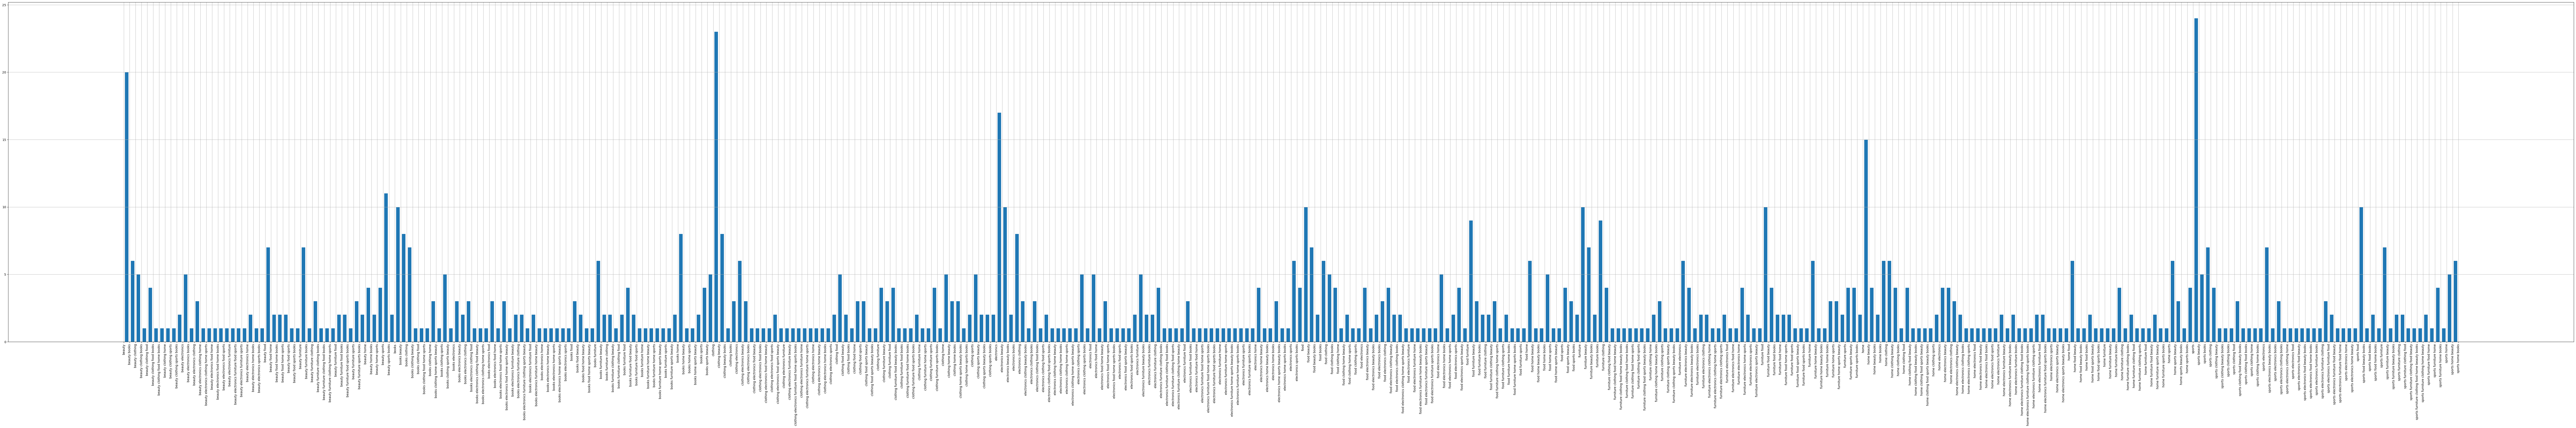

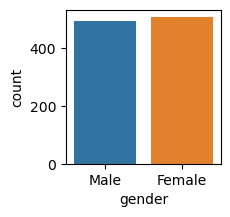

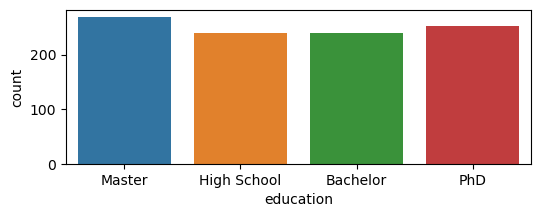

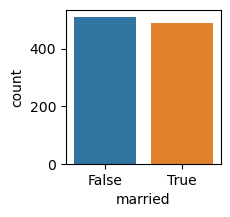

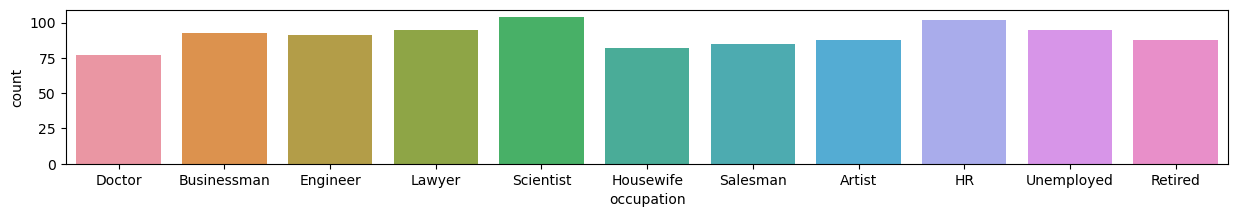

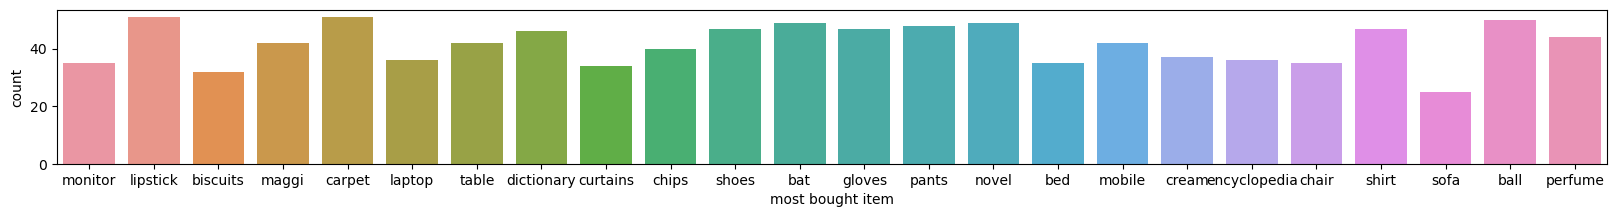

In [12]:
import matplotlib.pyplot as plt
### Data Visualisation
bins, counts = np.unique(y,return_counts = True)
plt.figure(figsize=(150,20))
ax = plt.axes()
ax.set_xticklabels(bins, rotation=90)
plt.hist(bins,bins, weights=counts, rwidth=0.6)
plt.grid()
plt.show()

bins, counts = np.unique(data2[:,1],return_counts = True)
plt.figure(figsize=(2,2))
sns.countplot(data=df,x='gender')

plt.figure(figsize=(6,2))
sns.countplot(data=df,x='education')

plt.figure(figsize=(2,2))
sns.countplot(data=df,x='married')

plt.figure(figsize=(15,2))
sns.countplot(data=df,x='occupation')

plt.figure(figsize=(20,2))
sns.countplot(data=df,x='most bought item')
plt.show()

In [13]:
allLabels = []

for i in range(len(y)):
    y[i] = (str(y[i]).split())
    y[i].sort()
    for j in y[i]:
        allLabels.append(j)

uniqueLabels = np.unique(np.array(allLabels))
print(uniqueLabels)

['beauty' 'books' 'clothing' 'electronics' 'food' 'furniture' 'home'
 'sports']


In [14]:
### For creating PowerSet
### This part was taken from ChatGPT:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [15]:
### For creating power set labeling and label encoding
power_setDict = {}
power_set = list(powerset(uniqueLabels))
for i in range(len(power_set)):
    power_setDict[power_set[i]] = i

yPowerSetEncoded = [power_setDict[tuple(i)] for i in y]
yLabelEncoded = labelEncode([str(i) for i in y])
print(max(yPowerSetEncoded))
print(max(yLabelEncoded))

254
201


In [16]:
### creating train test split
splitIndex = int(len(X)*0.8)
(X_train, X_test) = (X[:splitIndex],X[splitIndex:])
(yP_train, yP_test) = (yPowerSetEncoded[:splitIndex],yPowerSetEncoded[splitIndex:])
(yL_train, yL_test) = (yLabelEncoded[:splitIndex],yLabelEncoded[splitIndex:])

In [17]:
### Creating the model
from sklearn.tree import DecisionTreeClassifier

class DecisionTreeModel():
    def __init__(self,criterion=None, max_depth=None, max_features=None, random_state=42):
        self.criterion = criterion
        self.max_depth = max_depth
        self.max_features = max_features
        self.Model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, max_features=max_features, random_state=random_state)

    def fitData(self,X_train,y_train):
        self.Model.fit(X_train,y_train)
    
    def predict(self,X_test):
        return self.Model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

# Testing the models
clfP = DecisionTreeModel(criterion='gini',max_features=3,max_depth=3)
clfP.fitData(X_train,yP_train)
y_preds = clfP.predict(X_test)
accP = accuracy_score(yP_test,y_preds)
print(accP)

0.015


In [19]:
from sklearn.metrics import confusion_matrix

criterionList = ["gini","entropy"]
max_depthList = [3,5,10,20,30]
max_featuresList = [3,5,7,9,11]
metricP = []
metricL = []
cmL = []
cmP = []

for criterion in criterionList:
    for max_depth in max_depthList:
        for max_features in max_featuresList:
            clfTestP = DecisionTreeModel(criterion=criterion,max_features=max_features,max_depth=max_depth)
            clfTestP.fitData(X_train,yP_train)
            y_predsP = clfTestP.predict(X_test)
            accP = np.round(accuracy_score(yP_test,y_predsP),3)
            precisionP = np.round(precision_score(yP_test,y_predsP,average="micro"),3)
            recallP = np.round(recall_score(yP_test,y_predsP,average="micro"),3)
            f1Pmicro = np.round(f1_score(yP_test,y_predsP,average="micro"),3)
            f1Pmacro = np.round(f1_score(yP_test,y_predsP,average="macro"),3)
            metricP.append((criterion,max_depth,max_features,accP,precisionP,recallP,f1Pmicro,f1Pmacro))
            cmP.append(confusion_matrix(yP_test,y_predsP))

            clfTestL = DecisionTreeModel(criterion=criterion,max_features=max_features,max_depth=max_depth)
            clfTestL.fitData(X_train,yL_train)
            y_predsL = clfTestL.predict(X_test)
            accL = np.round(accuracy_score(yL_test,y_predsL),3)
            precisionL = np.round(precision_score(yL_test,y_predsL,average="micro"),3)
            recallL = np.round(recall_score(yL_test,y_predsL,average="micro"),3)
            f1Lmicro = np.round(f1_score(yL_test,y_predsL,average="micro"),3)
            f1Lmacro = np.round(f1_score(yL_test,y_predsL,average="macro"),3)
            metricL.append((criterion,max_depth,max_features,accP,precisionL,recallL,f1Lmicro,f1Lmacro))
            cmL.append(confusion_matrix(yL_test,y_predsL))


In [20]:
print("Power Set Encoding")
for i in cmP[:5]:
    print(i)

Power Set Encoding
[[1 2 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[4 2 0 ... 0 0 0]
 [2 4 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 3 3 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
[[0 3 3 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [21]:
print("Multi output Encoding")
for i in cmL[:5]:
    print(i)

Multi output Encoding
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [22]:
metricL = np.array(metricL)
order = np.argsort(metricL[:,3]) # accuracy sort order
metricL = metricL[order][::-1]

metricP = np.array(metricP)
order = np.argsort(metricP[:,3])
metricP = metricP[order][::-1]

In [23]:
dfOutL = pd.DataFrame()
dfOutL["Criterion"] = metricL[:,0]
dfOutL["MaxDepth"] = metricL[:,1]
dfOutL["MaxFeatures"] = metricL[:,2]
dfOutL["Accuracy"] = metricL[:,3]
dfOutL["Precision"] = metricL[:,4]
dfOutL["Recall"] = metricL[:,5]
dfOutL["F1-micro"] = metricL[:,6]
dfOutL["F1-macro"] = metricL[:,7]
print("\nFor multi output label encoding:\n",dfOutL[:10])

dfOutP = pd.DataFrame()
dfOutP["Criterion"] = metricP[:,0]
dfOutP["MaxDepth"] = metricP[:,1]
dfOutP["MaxFeatures"] = metricP[:,2]
dfOutP["Accuracy"] = metricP[:,3]
dfOutP["Precision"] = metricP[:,4]
dfOutP["Recall"] = metricP[:,5]
dfOutP["F1-micro"] = metricP[:,6]
dfOutP["F1-macro"] = metricP[:,7]
print("\nFor Power Set encoding:\n",dfOutP[:10])


For multi output label encoding:
   Criterion MaxDepth MaxFeatures Accuracy Precision Recall F1-micro F1-macro
0   entropy        5           9      0.1      0.08   0.08     0.08    0.017
1      gini       10          11     0.09      0.07   0.07     0.07    0.023
2      gini        5           9    0.085      0.07   0.07     0.07    0.012
3      gini        5          11    0.085     0.075  0.075    0.075    0.015
4      gini       10           9    0.085      0.06   0.06     0.06     0.03
5   entropy        5          11     0.08     0.065  0.065    0.065    0.012
6   entropy        3          11     0.07     0.075  0.075    0.075    0.009
7      gini        3           9     0.06      0.06   0.06     0.06    0.006
8      gini        3          11     0.06      0.06   0.06     0.06    0.006
9   entropy        3           9     0.06     0.065  0.065    0.065    0.007

For Power Set encoding:
   Criterion MaxDepth MaxFeatures Accuracy Precision Recall F1-micro F1-macro
0   entropy    

In [24]:
### Top 3 according to F1 score-micro:
print("Ranking top 3 performers acc to F1-score micro")
print("For multi output label encoding:")
print(dfOutL.iloc[np.argsort(metricL[:,6])[::-1]][:3])
print("\nFor Power Set encoding:")
print(dfOutP.iloc[np.argsort(metricP[:,6])[::-1]][:3])

print("\n\nRanking top 3 performers acc to F1-score macro")
print("For multi output label encoding:")
print(dfOutL.iloc[np.argsort(metricL[:,7])[::-1]][:3])
print("\nFor Power Set encoding:")
print(dfOutP.iloc[np.argsort(metricP[:,7])[::-1]][:3])

Ranking top 3 performers acc to F1-score micro
For multi output label encoding:
  Criterion MaxDepth MaxFeatures Accuracy Precision Recall F1-micro F1-macro
0   entropy        5           9      0.1      0.08   0.08     0.08    0.017
3      gini        5          11    0.085     0.075  0.075    0.075    0.015
6   entropy        3          11     0.07     0.075  0.075    0.075    0.009

For Power Set encoding:
  Criterion MaxDepth MaxFeatures Accuracy Precision Recall F1-micro F1-macro
0   entropy        5           9      0.1       0.1    0.1      0.1    0.018
1      gini       10          11     0.09      0.09   0.09     0.09    0.029
2      gini        5           9    0.085     0.085  0.085    0.085    0.015


Ranking top 3 performers acc to F1-score macro
For multi output label encoding:
   Criterion MaxDepth MaxFeatures Accuracy Precision Recall F1-micro F1-macro
4       gini       10           9    0.085      0.06   0.06     0.06     0.03
10      gini       30           9    0.05

[(0, 100), (100, 200), (200, 300), (300, 400), (400, 500), (500, 600), (600, 700), (700, 800), (800, 900), (900, 999)]
[0.01, 0.02, 0.05, 0.0, 0.03, 0.0, 0.01, 0.02, 0.05, 0.01]
[0.02, 0.02, 0.01, 0.0, 0.02, 0.02, 0.01, 0.03, 0.01, 0.01]


Text(0.5, 0.98, 'K fold validation')

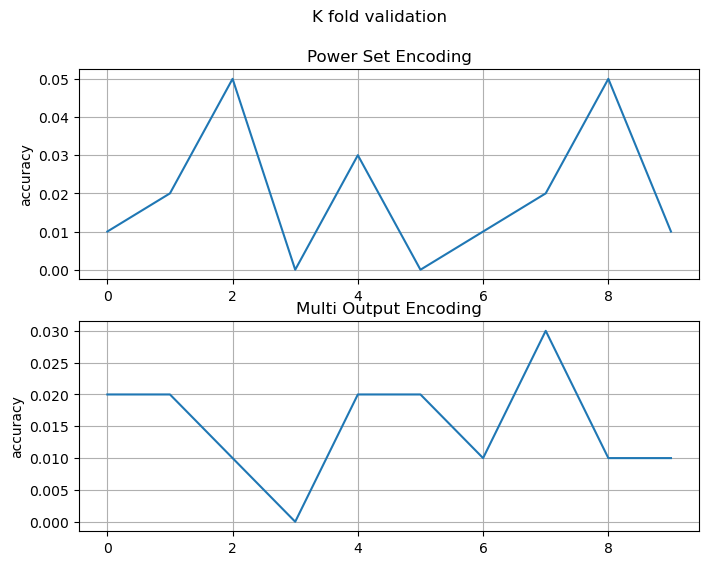

In [25]:
### K fold validation metrics
from sklearn.model_selection import KFold

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

kFoldLen = []
metricsKfoldP = []
metricsKfoldL = []

order = np.arange(0,len(X))
np.random.shuffle(order)

step = int(len(X)/num_folds)
for i in range(0,len(X),step):
    testIndices = order[i:min((i+step),len(X)-1)]
    trainIndices = np.setdiff1d(order, testIndices)
    X_train = np.array(X)[trainIndices]
    X_test = np.array(X)[testIndices]

    y_trainP = np.array(yPowerSetEncoded)[trainIndices]
    y_testP = np.array(yPowerSetEncoded)[testIndices]

    y_trainL = np.array(yLabelEncoded)[trainIndices]
    y_testL = np.array(yLabelEncoded)[testIndices]

    # Best powerset model
    model1 = DecisionTreeModel(criterion="entropy",max_features=5,max_depth=9)
    model1.fitData(X_train, y_trainP)
    y_preds1 = model1.predict(X_test)
    accP = np.round(accuracy_score(y_testP,y_preds1),3)

    #     # Best multi output model
    model2 = DecisionTreeModel(criterion="entropy",max_features=5,max_depth=9)
    model2.fitData(X_train, y_trainL)
    y_preds2 = model2.predict(X_test)
    accL = np.round(accuracy_score(y_testL,y_preds2),3)

    K = (i,min(i+step,len(X)-1))
    kFoldLen.append(K)
    metricsKfoldP.append(accP)
    metricsKfoldL.append(accL)

print(kFoldLen)
print(metricsKfoldP)
print(metricsKfoldL)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(metricsKfoldP)
plt.grid()
plt.ylabel("accuracy")
plt.title("Power Set Encoding")

plt.subplot(2,1,2)
plt.plot(metricsKfoldL)
plt.grid()
plt.ylabel("accuracy")
plt.title("Multi Output Encoding")

plt.suptitle("K fold validation")